# 4.3
## 1.
### Imports

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### Ler os dados

In [2]:
dados_lidos = pd.read_csv("CO_data.csv")

### Variáveis

In [3]:
# Listas de paises e anos
areas_geo = ["Africa", "Asia", "South America", "North America", "Europe", "Oceania"]
etiquetas_areas = ["África", "Ásia", "América do Sul", "América do Norte", "Europa", "Oceania"]  # Nomes em PT
anos = list(range(2000, 2022))

# Definição das condições de filtragem do dataset dos dados lidos.
condicao_anos = dados_lidos["year"].isin(anos)

### Obter dados dos anos pretendidos para as áreas geográficas em estudo.

In [4]:
dados_areas_geo = {}  # Dicionário para guardar os datasets individuais.

for area_geo in areas_geo:
    condicao_area_geo = dados_lidos.country == area_geo
    dados_areas_geo[area_geo] = list(dados_lidos.loc[condicao_anos & condicao_area_geo, ["co2"]]["co2"])

# Para o cálculo das correlações precisamos de um *Dataset* do **pandas**.
dados_trabalho = pd.DataFrame(dados_areas_geo)

# Precisamos de uma lista para a função *levene* e para os  boxplots.
emissoes_areas_geo = list(dados_areas_geo.values())

# Caso se pretenda inserir a coluna com os anos no Dataset.
# dados_trabalho.insert(0, "year", anos)

### Verificação dos pressupostos

As variáveis ("Emissão de $CO_2$ de carvão") são contínuas.
Não existem outliers (ver Boxplot abaixo).
Existe relação linear, porque dizem respeito ao mesmo intervalo de tempo (anos). 

#### Homocedasticidade (Variâncias iguais)

$H_0$: As amostras têm variâncias iguais
$H_1$: As amostras não têm variâncias iguais

In [5]:
result_levene = stats.levene(*emissoes_areas_geo)
print(f"Estatistica: {result_levene.statistic}\np-value: {result_levene.pvalue}")

Estatistica: 51.12822579414353
p-value: 1.0261338190289548e-28


Como o valor de p-value é muito baixo (próximo de zero) rejeitamos a hipótese nula, ou seja, consideramos que as variâncias não são iguais.

#### Normalidade (shapiro)

In [6]:
stats.shapiro(dados_trabalho)

ShapiroResult(statistic=0.7802441599602413, pvalue=8.731688749385906e-13)

#### Boxplot

Optámos por criar gráficos com os boxplots separados, para melhorar a visialização de cada um deles de forma isolada.
É preciso ter atenção que as escalas para cada um dos gráfico são os valores à esquerda de cada um deles e existem diferenças que podem atingir 2 ou mesmo 3 ordens de grandeza.

Para efeitos de visualiza

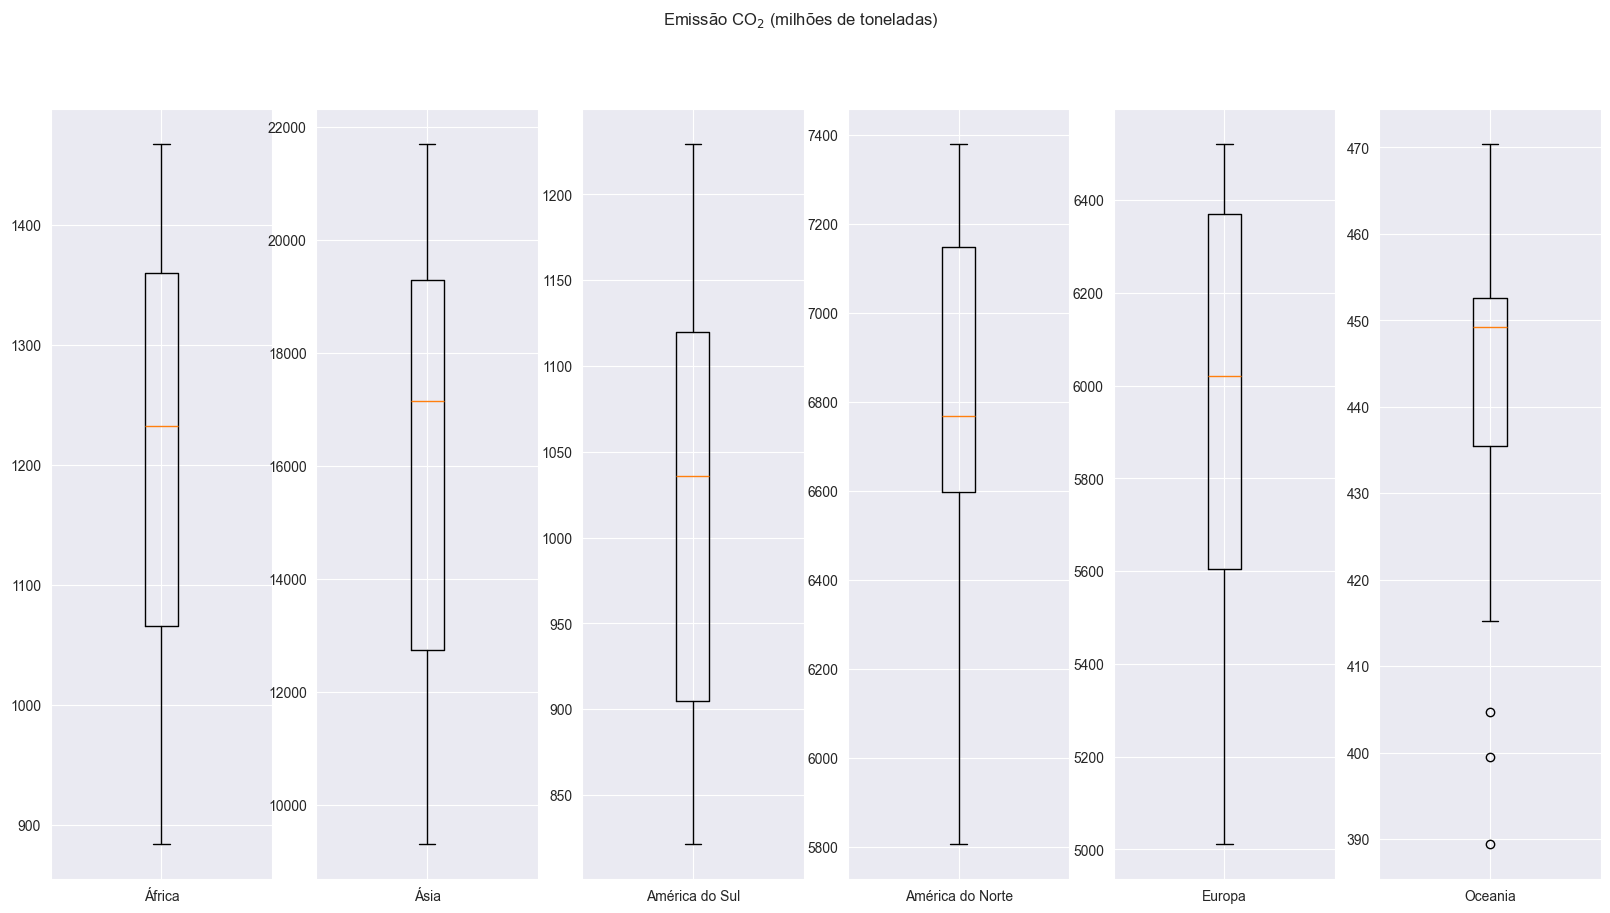

In [7]:
fig_bp, ax_bp = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

boxplots = []

for idx in range(0, 6):
    boxplot = ax_bp[idx].boxplot(emissoes_areas_geo[idx:idx+1], labels=etiquetas_areas[idx:idx+1])
    boxplots.append(boxplot)

titulo_boxplots = fig_bp.suptitle(r"Emissão CO$_2$ (milhões de toneladas)")
# fig_bp.show()  # Em jupyter pode apresentar um aviso.


##### Boxplot com todas as áreas

O único de ter um boxplot isolado para área é o facto de haver uma grande diferença das ordens de grandeza dos valores de cada país.
Como podemos ver no gráfico abaixo, seria perdida muita da informação que normalmente é obtido deste tipo de "ferramenta".

NOTA: Como é apenas para "demonstrar" não ser a solução adequada, não se dedicou tempo a melhorar a apresentação do mesmo. 

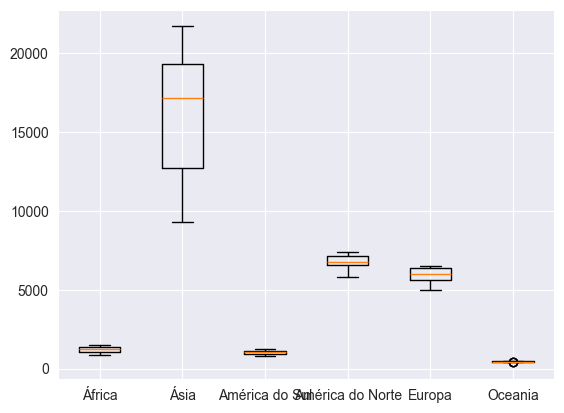

In [8]:
boxplots_areas = plt.boxplot(emissoes_areas_geo, labels=etiquetas_areas)

### Tabela de correlação

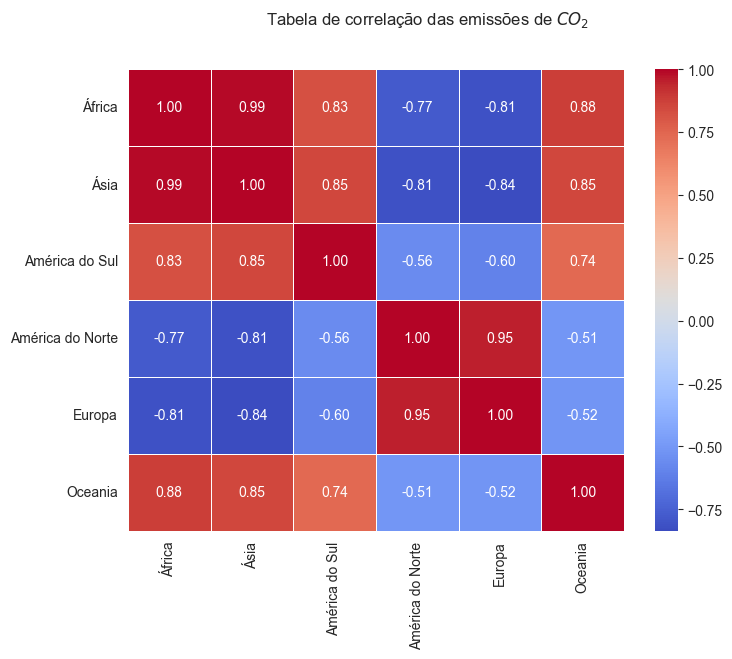

In [9]:
# Calcular a correlação dos dados.
matriz_das_correlacoes = dados_trabalho.corr()

# Desenho da tabela/matriz de correlação 
fig_matriz = plt.figure(figsize=(8, 6))
heat_matriz = sns.heatmap(
    matriz_das_correlacoes, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    xticklabels=etiquetas_areas,
    yticklabels=etiquetas_areas,
)
titulo_matriz = fig_matriz.suptitle(r"Tabela de correlação das emissões de $CO_2$")
# fig_matriz.show()  # Em jupyter pode apresentar um aviso.

Existe uma muito forte correlação positiva entre os valores das emissões de $CO_2$ de *África* e da *Ásia*.
Verifica-se também uma correlação positiva com outro par de zonas: *América do Norte* e *Europa*.

Estas correlações são tão fortes que o comportamento com outras zonas é similar.  

Note-se também que existem correlações negativas entre as zonas de cada um daqueles grupos,
ligeiramente mais forte no caso da *Asia* e *Europa*.